In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns
import matplotlib.pyplot as plt

#from Player Stats Web Scrape Notebook, it looks like FT, 3P and BLK 
#can be eliminated as features to simplify the model.
#Some polynomials that I'll want to include are:
    #(FG*Min_per_game)
    #(FG*FG_efficiency_per_min)
    #(Age*Min_per_game)
    #(Age*FG_efficency_per_min)
    #(Age*AST)
    #(FG_efficiency_per_min*Min_per_game)


In [4]:
df = pd.read_pickle('df_w_sal_pickle')

In [6]:
#I wanted to focus on players that played at least 150 minutes in the season and at least
#15 minutes per game.

df = df[df['MP']>=150]
df = df[df['Min_per_game']>=15]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FG_efficiency_per_min,FT_efficiency_per_min,TRB_per_min,AST_per_min,STL_per_min,BLK_per_min,TOV_per_min,Min_per_game,Salary,inflation_adjusted_salary
0,1,Arron Afflalo,SG,24,DEN,82,75,2221,272,585,...,0.146711,0.032431,0.113462,0.062134,0.020711,0.013507,0.033318,27.085366,"$1,086,240","$1,289,948"
1,3,LaMarcus Aldridge,PF,24,POR,78,78,2922,579,1169,...,0.198834,0.078757,0.214579,0.054757,0.022930,0.016427,0.035592,37.461538,"$5,844,827","$6,940,936"
3,7,Tony Allen,SG,28,BOS,54,8,889,129,253,...,0.145141,0.080984,0.163105,0.080990,0.066367,0.021372,0.074241,16.462963,"$2,500,000","$2,968,837"
4,8,Rafer Alston,PG,33,TOT,52,38,1421,155,446,...,0.129626,0.041498,0.090781,0.123856,0.035186,0.007037,0.066854,27.326923,"$5,053,133","$6,000,771"
5,8,Rafer Alston,PG,33,NJN,27,13,766,95,277,...,0.142478,0.057454,0.097911,0.135770,0.035248,0.006527,0.079634,28.370370,"$5,053,133","$6,000,771"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,522,Delon Wright,SG,27,DAL,73,5,1570,190,411,...,0.135866,0.049045,0.178344,0.155414,0.054140,0.014013,0.046497,21.506849,"$9,473,684","$9,473,684"
5239,524,Thaddeus Young,PF,31,CHI,64,16,1591,269,601,...,0.193786,0.026383,0.197989,0.073539,0.057825,0.014456,0.064111,24.859375,"$12,900,000","$12,900,000"
5240,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,...,0.305769,0.226764,0.120283,0.264151,0.030660,0.003774,0.136321,35.333333,"$6,273,000","$6,273,000"
5241,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,...,0.193957,0.091035,0.306488,0.065623,0.029828,0.018643,0.055928,23.120690,"$14,471,910","$14,471,910"


In [19]:
#eliminating columns that aren't needed

df = df[['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G','GS','MP','Min_per_game','FG','FG%'
         ,'eFG%', 'TRB', 'AST', 'STL', 'Year', 'FG_efficiency_per_min', 'inflation_adjusted_salary']].copy()

In [20]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,FG%,eFG%,TRB,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary
0,1,Arron Afflalo,SG,24,DEN,82,75,2221,27.085366,272,0.465,0.557,252,138,46,2010,0.146711,"$1,289,948"
1,3,LaMarcus Aldridge,PF,24,POR,78,78,2922,37.461538,579,0.495,0.497,627,160,67,2010,0.198834,"$6,940,936"
3,7,Tony Allen,SG,28,BOS,54,8,889,16.462963,129,0.510,0.510,145,72,59,2010,0.145141,"$2,968,837"
4,8,Rafer Alston,PG,33,TOT,52,38,1421,27.326923,155,0.348,0.413,129,176,50,2010,0.129626,"$6,000,771"
5,8,Rafer Alston,PG,33,NJN,27,13,766,28.370370,95,0.343,0.394,75,104,27,2010,0.142478,"$6,000,771"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,522,Delon Wright,SG,27,DAL,73,5,1570,21.506849,190,0.462,0.519,280,244,85,2020,0.135866,"$9,473,684"
5239,524,Thaddeus Young,PF,31,CHI,64,16,1591,24.859375,269,0.448,0.513,315,117,92,2020,0.193786,"$12,900,000"
5240,525,Trae Young,PG,21,ATL,60,60,2120,35.333333,546,0.437,0.519,255,560,65,2020,0.305769,"$6,273,000"
5241,526,Cody Zeller,C,27,CHO,58,39,1341,23.120690,251,0.524,0.543,411,88,40,2020,0.193957,"$14,471,910"


In [21]:
    #(FG*Min_per_game)
    #(FG*FG_efficiency_per_min)
    #(Age*Min_per_game)
    #(Age*FG_efficency_per_min)
    #(Age*AST)
    #(FG_efficiency_per_min*Min_per_game)

df.to_pickle('df_less_colums_pickle')

In [22]:
#inserting polynomial features into my df as new columns

df['FG_by_min_per_game'] = df['FG'] * df['Min_per_game']
df['FG_by_FG_efficiency_per_min'] = df['FG'] * df['FG_efficiency_per_min']
df['Age_by_Min_per_game'] = df['Age'] * df['Min_per_game']
df['Age_by_FG_efficency_per_min'] = df['Age'] * df['FG_efficiency_per_min']
df['Age_by_AST'] = df['Age'] * df['AST']
#df['FG_efficiency_per_min_by_Min_per_game'] ----> I'm not doing this as I realize this would
                                                    #just be FG_efficiency if I reduce the
                                                    #terms of the fraction.  Instead, I'll just
                                                    #use eFG%
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
0,1,Arron Afflalo,SG,24,DEN,82,75,2221,27.085366,272,...,138,46,2010,0.146711,"$1,289,948",7367.219512,39.905376,650.048780,3.521063,3312
1,3,LaMarcus Aldridge,PF,24,POR,78,78,2922,37.461538,579,...,160,67,2010,0.198834,"$6,940,936",21690.230769,115.124896,899.076923,4.772016,3840
3,7,Tony Allen,SG,28,BOS,54,8,889,16.462963,129,...,72,59,2010,0.145141,"$2,968,837",2123.722222,18.723138,460.962963,4.063937,2016
4,8,Rafer Alston,PG,33,TOT,52,38,1421,27.326923,155,...,176,50,2010,0.129626,"$6,000,771",4235.673077,20.091970,901.788462,4.277645,5808
5,8,Rafer Alston,PG,33,NJN,27,13,766,28.370370,95,...,104,27,2010,0.142478,"$6,000,771",2695.185185,13.535392,936.222222,4.701768,3432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,522,Delon Wright,SG,27,DAL,73,5,1570,21.506849,190,...,244,85,2020,0.135866,"$9,473,684",4086.301370,25.814465,580.684932,3.668371,6588
5239,524,Thaddeus Young,PF,31,CHI,64,16,1591,24.859375,269,...,117,92,2020,0.193786,"$12,900,000",6687.171875,52.128345,770.640625,6.007356,3627
5240,525,Trae Young,PG,21,ATL,60,60,2120,35.333333,546,...,560,65,2020,0.305769,"$6,273,000",19292.000000,166.950059,742.000000,6.421156,11760
5241,526,Cody Zeller,C,27,CHO,58,39,1341,23.120690,251,...,88,40,2020,0.193957,"$14,471,910",5803.293103,48.683331,624.258621,5.236852,2376


In [23]:
#again, I want to be strategic about my test/train/validate sets of data.  Below carves out 
#one year.

df_10 = df[df['Year']=='2010']
df_10

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
0,1,Arron Afflalo,SG,24,DEN,82,75,2221,27.085366,272,...,138,46,2010,0.146711,"$1,289,948",7367.219512,39.905376,650.048780,3.521063,3312
1,3,LaMarcus Aldridge,PF,24,POR,78,78,2922,37.461538,579,...,160,67,2010,0.198834,"$6,940,936",21690.230769,115.124896,899.076923,4.772016,3840
3,7,Tony Allen,SG,28,BOS,54,8,889,16.462963,129,...,72,59,2010,0.145141,"$2,968,837",2123.722222,18.723138,460.962963,4.063937,2016
4,8,Rafer Alston,PG,33,TOT,52,38,1421,27.326923,155,...,176,50,2010,0.129626,"$6,000,771",4235.673077,20.091970,901.788462,4.277645,5808
5,8,Rafer Alston,PG,33,NJN,27,13,766,28.370370,95,...,104,27,2010,0.142478,"$6,000,771",2695.185185,13.535392,936.222222,4.701768,3432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,437,Antoine Wright,SF,25,TOR,67,10,1392,20.776119,162,...,71,30,2010,0.137300,"$2,506,352",3365.731343,22.242530,519.402985,3.432489,1775
432,438,Dorell Wright,SF,24,MIA,72,1,1496,20.777778,194,...,91,52,2010,0.150123,"$3,265,721",4030.888889,29.123861,498.666667,3.602952,2184
434,440,Nick Young,SG,24,WAS,74,23,1421,19.202703,233,...,48,28,2010,0.188094,"$2,036,385",4474.229730,43.825972,460.864865,4.514263,1152
435,441,Sam Young,SF,24,MEM,80,1,1321,16.512500,224,...,52,34,2010,0.173818,"$978,766",3698.800000,38.935304,396.300000,4.171640,1248


In [24]:
#same as above, but, for a new year.

df_11 = df[df['Year']=='2011']
df_11

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
438,2,Arron Afflalo,SG,25,DEN,69,69,2324,33.681159,312,...,168,34,2011,0.156750,"$2,302,809",10508.521739,48.906000,842.028986,3.918750,4200
440,7,LaMarcus Aldridge,PF,25,POR,81,81,3211,39.641975,707,...,170,82,2011,0.220777,"$13,213,460",28026.876543,156.089351,991.049383,5.519425,4250
442,10,Tony Allen,SG,29,MEM,72,31,1494,20.750000,251,...,104,129,2011,0.169269,"$3,525,469",5208.250000,42.486538,601.750000,4.908803,3016
443,11,Al-Farouq Aminu,SF,20,LAC,81,14,1452,17.925926,160,...,60,59,2011,0.125826,"$3,012,302",2868.148148,20.132231,358.518519,2.516529,1200
444,13,Chris Andersen,C,32,DEN,45,0,732,16.266667,82,...,20,23,2011,0.112108,"$5,327,337",1333.866667,9.192850,520.533333,3.587454,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,445,Metta World Peace,SF,31,LAL,82,82,2410,29.390244,261,...,175,124,2011,0.125593,"$7,429,715",7670.853659,32.779867,911.097561,3.893394,5425
910,448,Dorell Wright,SF,25,GSW,82,82,3147,38.378049,485,...,242,124,2011,0.184991,"$4,113,047",18613.353659,89.720839,959.451220,4.624786,6050
912,450,Nick Young,SG,25,WAS,64,40,2034,31.781250,412,...,75,45,2011,0.228464,"$3,091,252",13093.875000,94.127011,794.531250,5.711590,1875
913,451,Sam Young,SF,25,MEM,78,46,1577,20.217949,233,...,71,68,2011,0.153181,"$1,041,188",4710.782051,35.691108,505.448718,3.829518,1775


In [25]:
#same as above, but, for a new year.

df_12 = df[df['Year']=='2012']
df_12

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
916,2,Arron Afflalo,SG,26,DEN,62,62,2086,33.645161,329,...,149,36,2012,0.178939,"$8,581,713",11069.258065,58.870812,874.774194,4.652405,3874
918,6,LaMarcus Aldridge,PF,26,POR,55,55,1994,36.254545,483,...,134,51,2012,0.242607,"$14,039,398",17510.945455,117.179337,942.618182,6.307790,3484
919,7,Lavoy Allen,PF,22,PHI,41,15,624,15.219512,79,...,34,13,2012,0.126588,"$537,432",1202.341463,10.000463,334.829268,2.784939,748
920,9,Tony Allen,SG,30,MEM,58,57,1525,26.293103,210,...,79,104,2012,0.140422,"$3,574,531",5521.551724,29.488682,788.793103,4.212669,2370
921,11,Al-Farouq Aminu,SF,21,NOH,66,21,1477,22.378788,150,...,66,59,2012,0.106016,"$3,126,932",3356.818182,15.902336,469.954545,2.226327,1386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,475,Dorell Wright,SF,26,GSW,61,61,1650,27.049180,222,...,94,58,2012,0.166407,"$4,338,233",6004.918033,36.942415,703.278689,4.326589,2444
1335,476,Nick Young,SG,26,TOT,62,35,1729,27.887097,316,...,56,44,2012,0.212664,"$4,193,954",8812.322581,67.201814,725.064516,5.529263,1456
1336,476,Nick Young,SG,26,WAS,40,32,1211,30.275000,240,...,46,30,2012,0.228396,"$4,193,954",7266.000000,54.815128,787.150000,5.938306,1196
1337,476,Nick Young,SG,26,LAC,22,3,518,23.545455,76,...,10,14,2012,0.175861,"$4,193,954",1789.454545,13.365436,612.181818,4.572386,260


In [26]:
#same as above, but, for a new year.

df_13 = df[df['Year']=='2013']
df_13

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
1344,3,Arron Afflalo,SF,27,ORL,64,64,2307,36.046875,397,...,206,40,2013,0.187512,"$8,441,251",14310.609375,74.442232,973.265625,5.062822,5562
1347,6,LaMarcus Aldridge,PF,27,POR,74,74,2790,37.702703,638,...,192,62,2013,0.229115,"$14,510,580",24054.324324,146.175176,1017.972973,6.186097,5184
1348,7,Lavoy Allen,C,23,PHI,79,37,1669,21.126582,206,...,73,24,2013,0.123497,"$3,348,595",4352.075949,25.440321,485.911392,2.840424,1679
1349,9,Tony Allen,SG,31,MEM,79,79,2109,26.696203,284,...,98,119,2013,0.135223,"$3,683,455",7581.721519,38.403425,827.582278,4.191923,3038
1350,10,Al-Farouq Aminu,SF,22,NOH,76,71,2066,27.184211,225,...,103,92,2013,0.109896,"$3,290,329",6116.447368,24.726694,598.052632,2.417721,2266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,461,Brandan Wright,C,25,DAL,64,16,1149,17.953125,241,...,38,26,2013,0.209911,"$1,108,027",4326.703125,50.588606,448.828125,5.247781,950
1775,463,Dorell Wright,SF,27,PHI,79,8,1783,22.569620,237,...,150,62,2013,0.170663,"$4,583,111",5349.000000,40.447114,609.379747,4.607899,4050
1777,465,Nick Young,SG,27,PHI,59,17,1411,23.915254,224,...,84,36,2013,0.185148,"$6,697,191",5357.016949,41.473179,645.711864,4.998999,2268
1779,467,Thaddeus Young,PF,24,PHI,76,76,2629,34.592105,509,...,125,133,2013,0.193859,"$8,973,264",17607.381579,98.674364,830.210526,4.652622,3000


In [27]:
#same as above, but, for a new year.

df_14 = df[df['Year']=='2014']
df_14

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
1785,3,Jeff Adrien,PF,27,TOT,53,12,961,18.132075,143,...,38,24,2014,0.148803,"$1,004,917",2592.886792,21.278876,489.566038,4.017690,1026
1787,3,Jeff Adrien,PF,27,MIL,28,12,705,25.178571,121,...,31,17,2014,0.171667,"$1,004,917",3046.607143,20.771667,679.821429,4.635000,837
1788,4,Arron Afflalo,SG,28,ORL,73,73,2552,34.958904,464,...,248,35,2014,0.206795,"$8,295,709",16220.931507,95.953091,978.849315,5.790273,6944
1789,7,LaMarcus Aldridge,PF,28,POR,69,69,2498,36.202899,652,...,178,63,2014,0.261472,"$15,467,042",23604.289855,170.479729,1013.681159,7.321215,4984
1790,8,Lavoy Allen,PF,24,TOT,65,2,1072,16.492308,134,...,71,24,2014,0.125933,"$3,422,494",2209.969231,16.875000,395.815385,3.022388,1704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,475,Brandan Wright,C,26,DAL,58,0,1077,18.568966,224,...,31,32,2014,0.208066,"$5,484,766",4159.448276,46.606767,482.793103,5.409714,806
2243,478,Tony Wroten,PG,20,PHI,72,16,1765,24.513889,345,...,217,78,2014,0.206921,"$1,272,509",8457.291667,71.387830,490.277778,4.138425,4340
2244,479,Nick Young,SG,28,LAL,64,9,1810,28.281250,387,...,95,46,2014,0.250983,"$1,214,263",10944.843750,97.130372,791.875000,7.027520,2660
2245,480,Thaddeus Young,PF,25,PHI,79,78,2718,34.405063,582,...,182,167,2014,0.230827,"$9,433,798",20023.746835,134.341146,860.126582,5.770668,4550


In [28]:
#same as above, but, for a new year.

df_15 = df[df['Year']=='2015']
df_15

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
2248,1,Quincy Acy,PF,24,NYK,68,22,1287,18.926471,152,...,68,27,2015,0.124993,"$983,595",2876.823529,18.998937,454.235294,2.999832,1632
2250,3,Steven Adams,C,21,OKC,70,67,1771,25.300000,217,...,66,38,2015,0.122561,"$2,348,137",5490.100000,26.595794,531.300000,2.573787,1386
2252,5,Arron Afflalo,SG,29,TOT,78,72,2502,32.076923,375,...,129,41,2015,0.173479,"$8,127,284",12028.846154,65.054556,930.230769,5.030886,3741
2253,5,Arron Afflalo,SG,29,DEN,53,53,1750,33.018868,281,...,101,32,2015,0.183960,"$8,127,284",9278.301887,51.692760,957.547170,5.334840,2929
2254,5,Arron Afflalo,SG,29,POR,25,19,752,30.080000,94,...,28,9,2015,0.148818,"$8,127,284",2827.520000,13.988875,872.320000,4.315717,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,490,Thaddeus Young,PF,26,TOT,76,68,2434,32.026316,451,...,173,124,2015,0.193282,"$9,845,024",14443.868421,87.170110,832.684211,5.025328,4498
2750,490,Thaddeus Young,PF,26,MIN,48,48,1605,33.437500,289,...,135,86,2015,0.186110,"$9,845,024",9663.437500,53.785691,869.375000,4.838851,3510
2751,490,Thaddeus Young,PF,26,BRK,28,20,829,29.607143,162,...,38,38,2015,0.206692,"$9,845,024",4796.357143,33.484169,769.785714,5.374002,988
2752,491,Cody Zeller,C,22,CHO,62,45,1487,23.983871,172,...,100,34,2015,0.115888,"$4,331,571",4125.225806,19.932799,527.645161,2.549544,2200


In [29]:
#same as above, but, for a new year.

df_16 = df[df['Year']=='2016']
df_16

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
2755,3,Steven Adams,C,22,OKC,80,80,2014,25.175000,261,...,62,42,2016,0.129661,"$2,446,216",6570.675000,33.841618,553.850000,2.852550,1364
2756,4,Arron Afflalo,SG,30,NYK,71,57,2371,33.394366,354,...,144,25,2016,0.168494,"$8,586,830",11821.605634,59.646984,1001.830986,5.054829,4320
2758,7,LaMarcus Aldridge,PF,30,SAS,74,74,2261,30.554054,536,...,110,38,2016,0.237101,"$21,133,262",16376.972973,127.086050,916.621622,7.113025,3300
2759,9,Lavoy Allen,PF,26,IND,79,28,1599,20.240506,191,...,76,26,2016,0.119400,"$3,810,405",3865.936709,22.805328,526.253165,3.104390,1976
2760,10,Tony Allen,SG,34,MEM,64,57,1620,25.312500,215,...,70,110,2016,0.137226,"$5,366,768",5442.187500,29.503574,860.625000,4.665681,2380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,467,Metta World Peace,SF,36,LAL,35,5,590,16.857143,55,...,27,22,2016,0.115200,"$1,609,158",927.142857,6.336000,606.857143,4.147200,972
3195,468,Brandan Wright,PF,28,MEM,12,2,212,17.666667,35,...,6,5,2016,0.165075,"$5,864,805",618.333333,5.777642,494.666667,4.622113,168
3198,473,Nick Young,SG,30,LAL,54,2,1033,19.129630,126,...,34,23,2016,0.159171,"$5,602,014",2410.333333,20.055590,573.888889,4.775140,1020
3199,474,Thaddeus Young,PF,27,BRK,73,73,2407,32.972603,495,...,135,112,2016,0.207243,"$12,060,154",16321.438356,102.585305,890.260274,5.595562,3645


In [30]:
#same as above, but, for a new year.

df_17 = df[df['Year']=='2017']
df_17

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
3204,2,Quincy Acy,PF,26,BRK,32,1,510,15.937500,65,...,18,14,2017,0.162600,"$3,151,603",1035.937500,10.569000,414.375000,4.227600,468
3205,3,Steven Adams,C,23,OKC,80,80,2389,29.862500,374,...,86,89,2017,0.156553,"$3,337,599",11168.575000,58.550804,686.837500,3.600718,1978
3206,4,Arron Afflalo,SG,31,SAC,61,45,1580,25.901639,185,...,78,21,2017,0.136633,"$13,284,433",4791.803279,25.277089,802.950820,4.235620,2418
3208,7,LaMarcus Aldridge,PF,31,SAS,72,72,2335,32.430556,500,...,139,46,2017,0.219234,"$21,866,182",16215.277778,109.617131,1005.347222,6.796262,4309
3210,9,Tony Allen,SG,35,MEM,71,66,1914,26.957746,274,...,98,115,2017,0.147040,"$5,313,773",7386.422535,40.289023,943.521127,5.146408,3430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,480,Nick Young,SG,31,LAL,60,60,1556,25.933333,272,...,58,37,2017,0.229442,"$5,785,549",7053.866667,62.408267,803.933333,7.112707,1798
3669,481,Thaddeus Young,PF,28,IND,74,74,2237,30.229730,362,...,122,113,2017,0.171980,"$12,836,643",10943.162162,62.256880,846.432432,4.815449,3416
3670,482,Cody Zeller,C,24,CHO,62,58,1725,27.822581,253,...,99,62,2017,0.146639,"$5,652,061",7039.112903,37.099773,667.741935,3.519346,2376
3672,485,Paul Zipser,SF,22,CHI,44,18,843,19.159091,88,...,36,15,2017,0.124001,"$797,065",1686.000000,10.912104,421.500000,2.728026,792


In [31]:
#same as above, but, for a new year.

df_18 = df[df['Year']=='2018']
df_18

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
3674,2,Quincy Acy,PF,27,BRK,70,8,1359,19.414286,130,...,57,33,2018,0.133216,"$1,787,618",2523.857143,17.318028,524.185714,3.596821,1539
3675,3,Steven Adams,C,24,OKC,76,76,2487,32.723684,448,...,88,92,2018,0.180076,"$23,498,286",14660.210526,80.673866,785.368421,4.321814,2112
3676,4,Bam Adebayo,C,20,MIA,69,19,1368,19.826087,174,...,101,32,2018,0.127251,"$2,604,103",3449.739130,22.141754,396.521739,2.545029,2020
3678,7,LaMarcus Aldridge,C,32,SAS,75,75,2509,33.453333,687,...,152,43,2018,0.279171,"$22,441,213",22982.440000,191.790466,1070.506667,8.933472,4864
3679,8,Jarrett Allen,C,19,BRK,72,31,1441,20.013889,234,...,49,28,2018,0.164200,"$1,791,991",4683.250000,38.422768,380.263889,3.119797,931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,536,Cody Zeller,C,25,CHO,33,0,627,19.000000,85,...,31,14,2018,0.137091,"$13,159,040",1615.000000,11.652727,475.000000,3.427273,775
4173,537,Tyler Zeller,C,28,TOT,66,34,1109,16.803030,187,...,47,15,2018,0.173174,"$1,787,618",3142.166667,32.383544,470.484848,4.848873,1316
4174,537,Tyler Zeller,C,28,BRK,42,33,703,16.738095,125,...,28,8,2018,0.185024,"$1,787,618",2092.261905,23.128023,468.666667,5.180677,784
4175,537,Tyler Zeller,C,28,MIL,24,1,406,16.916667,62,...,19,7,2018,0.152586,"$1,787,618",1048.833333,9.460345,473.666667,4.272414,532


In [32]:
#same as above, but, for a new year.

df_19 = df[df['Year']=='2019']
df_19

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
4180,4,Steven Adams,C,25,OKC,80,80,2669,33.362500,481,...,124,117,2019,0.180350,"$24,555,533",16047.362500,86.748503,834.062500,4.508758,3100
4181,5,Bam Adebayo,C,21,MIA,82,28,1913,23.329268,280,...,184,71,2019,0.147096,"$3,004,566",6532.195122,41.186785,489.914634,3.089009,3864
4183,8,LaMarcus Aldridge,C,33,SAS,81,81,2687,33.172840,684,...,194,43,2019,0.256240,"$22,715,402",22690.222222,175.268445,1094.703704,8.455934,6402
4186,11,Jarrett Allen,C,20,BRK,80,80,2096,26.200000,335,...,110,43,2019,0.161240,"$2,067,652",8777.000000,54.015553,524.000000,3.224809,2200
4187,12,Kadeem Allen,SG,26,NYK,19,1,416,21.894737,65,...,76,16,2019,0.176589,"$78,523",1423.157895,11.478281,569.263158,4.591312,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,526,Trae Young,PG,20,ATL,81,81,2503,30.901235,525,...,653,72,2019,0.240863,"$5,451,692",16223.148148,126.453056,618.024691,4.817259,13060
4721,527,Cody Zeller,C,26,CHO,49,47,1243,25.367347,190,...,102,38,2019,0.155153,"$13,751,098",4819.795918,29.479043,659.551020,4.033974,2652
4724,530,Ivica Zubac,C,21,TOT,59,37,1040,17.627119,212,...,63,14,2019,0.203712,"$1,570,419",3736.949153,43.187050,370.169492,4.277963,1323
4725,530,Ivica Zubac,C,21,LAL,33,12,516,15.636364,112,...,25,4,2019,0.216938,"$1,570,419",1751.272727,24.297054,328.363636,4.555698,525


In [33]:
#creating df's for train/test/validate data.  I excluded 2020 as it wasn't a full year for
#every team due to the temporary COVID shutdown of the NBA.

df_train = pd.concat([df_10, df_19, df_17, df_15, df_13])
df_test = pd.concat([df_11, df_12, df_14, df_16])
df_validate = df_18

In [35]:
df_train['inflation_adjusted_salary']=df_train['inflation_adjusted_salary'].replace(['\$','\,'],'',regex=True).astype(float)

df_test['inflation_adjusted_salary']=df_test['inflation_adjusted_salary'].replace(['\$','\,'],'',regex=True).astype(float)

df_validate['inflation_adjusted_salary']=df_validate['inflation_adjusted_salary'].replace(['\$','\,'],'',regex=True).astype(float)



<ipython-input-35-bfa973d88e63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validate['inflation_adjusted_salary']=df_validate['inflation_adjusted_salary'].replace(['\$','\,'],'',regex=True).astype(float)


In [36]:
df_train

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,AST,STL,Year,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST
0,1,Arron Afflalo,SG,24,DEN,82,75,2221,27.085366,272,...,138,46,2010,0.146711,1289948.0,7367.219512,39.905376,650.048780,3.521063,3312
1,3,LaMarcus Aldridge,PF,24,POR,78,78,2922,37.461538,579,...,160,67,2010,0.198834,6940936.0,21690.230769,115.124896,899.076923,4.772016,3840
3,7,Tony Allen,SG,28,BOS,54,8,889,16.462963,129,...,72,59,2010,0.145141,2968837.0,2123.722222,18.723138,460.962963,4.063937,2016
4,8,Rafer Alston,PG,33,TOT,52,38,1421,27.326923,155,...,176,50,2010,0.129626,6000771.0,4235.673077,20.091970,901.788462,4.277645,5808
5,8,Rafer Alston,PG,33,NJN,27,13,766,28.370370,95,...,104,27,2010,0.142478,6000771.0,2695.185185,13.535392,936.222222,4.701768,3432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,461,Brandan Wright,C,25,DAL,64,16,1149,17.953125,241,...,38,26,2013,0.209911,1108027.0,4326.703125,50.588606,448.828125,5.247781,950
1775,463,Dorell Wright,SF,27,PHI,79,8,1783,22.569620,237,...,150,62,2013,0.170663,4583111.0,5349.000000,40.447114,609.379747,4.607899,4050
1777,465,Nick Young,SG,27,PHI,59,17,1411,23.915254,224,...,84,36,2013,0.185148,6697191.0,5357.016949,41.473179,645.711864,4.998999,2268
1779,467,Thaddeus Young,PF,24,PHI,76,76,2629,34.592105,509,...,125,133,2013,0.193859,8973264.0,17607.381579,98.674364,830.210526,4.652622,3000


In [37]:
df_train.dtypes

Rk                               int64
Player                          object
Pos                             object
Age                              int64
Tm                              object
G                                int64
GS                               int64
MP                               int64
Min_per_game                   float64
FG                               int64
FG%                            float64
eFG%                           float64
TRB                              int64
AST                              int64
STL                              int64
Year                            object
FG_efficiency_per_min          float64
inflation_adjusted_salary      float64
FG_by_min_per_game             float64
FG_by_FG_efficiency_per_min    float64
Age_by_Min_per_game            float64
Age_by_FG_efficency_per_min    float64
Age_by_AST                       int64
dtype: object

In [42]:
#running linear regression on my final model.

nba_sal = LinearRegression()

X = df_train[['Age', 'FG', 'FG_efficiency_per_min', 'AST', 'TRB', 'Min_per_game',
              'FG_by_min_per_game', 'FG_by_FG_efficiency_per_min','Age_by_Min_per_game',
              'Age_by_FG_efficency_per_min', 'Age_by_AST','eFG%']]
Y = df_train['inflation_adjusted_salary']

X_test = df_test[['Age', 'FG', 'FG_efficiency_per_min', 'AST', 'TRB', 'Min_per_game',
              'FG_by_min_per_game', 'FG_by_FG_efficiency_per_min','Age_by_Min_per_game',
              'Age_by_FG_efficency_per_min', 'Age_by_AST', 'eFG%']]
Y_test = df_test['inflation_adjusted_salary']

X_validate = df_validate[['Age', 'FG', 'FG_efficiency_per_min', 'AST', 'TRB', 'Min_per_game',
              'FG_by_min_per_game', 'FG_by_FG_efficiency_per_min','Age_by_Min_per_game',
              'Age_by_FG_efficency_per_min', 'Age_by_AST','eFG%']]
Y_validate = df_validate['inflation_adjusted_salary']

nba_sal.fit(X, Y)

ScoreTrain = nba_sal.score(X ,Y)

ScoreTest = nba_sal.score(X_test, Y_test)

ScoreValidate = nba_sal.score(X_validate, Y_validate)

print(f'This scores {ScoreTrain} for training data.')
print(f'This scores {ScoreTest} for test data.')
print(f'This scores {ScoreValidate} for validation data.')

This scores 0.5016685704164289 for training data.
This scores 0.5346161544874165 for test data.
This scores 0.5116731811701947 for validation data.


In [51]:
#for the below charts, I want to put most of my data into one df
#however, I want to exclude 2020 because the full season wasn't played for a large
#percentage of players

df_full = pd.concat([df_test, df_train, df_validate])
X_full = df_full[['Age', 'FG', 'FG_efficiency_per_min', 'AST', 'TRB', 'Min_per_game',
                  'FG_by_min_per_game', 'FG_by_FG_efficiency_per_min','Age_by_Min_per_game',
                  'Age_by_FG_efficency_per_min', 'Age_by_AST','eFG%']]
Y_full = df_full['inflation_adjusted_salary']

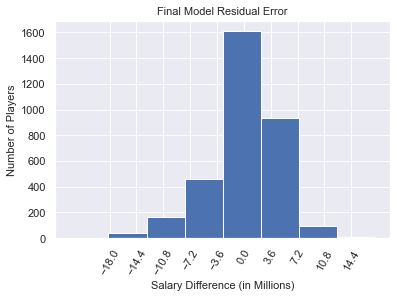

In [102]:
#plotting how well (or poorly) my model did in predicting NBA salaries.  I divided by $1mm
#on the salaries to make the chart easier to read.
#This chart shows that my model was predicting higher salaries in many cases.  But, the band
#of +/- $3.6mm in predicted salary vs actual salary had nearly 50% of the population.
 
df_full['final_model_predictions']=nba_sal.predict(X_full)/1000000
df_full['final_model_error'] = df_full['final_model_predictions']-df_full['inflation_adjusted_salary']/1000000
df_full['final_model_abs_error'] = abs(df_full['final_model_error'])
sns.set()
plt.ticklabel_format(style='plain');

plt.grid(axis='y', alpha=0.95)
plt.xlabel('Salary Difference (in Millions)',fontsize=11)
plt.ylabel('Number of Players',fontsize=11)
plt.xticks(np.arange(-18,18,18/5),fontsize=11, rotation=60)
plt.yticks(fontsize=11)
plt.ylabel('Number of Players',fontsize=11)

plt.hist(df_full['final_model_error'], bins=8);
plt.title('Final Model Residual Error',fontsize=11);
plt.savefig("Final Model Residuals.png",bbox_inches='tight')

In [81]:
#visualizing the above outliers in a table format.

mask = ((df_full['final_model_error']<=18) & (df_full['final_model_error']>=3.6))
df_full[mask].sort_values(ascending=False, by='final_model_error')

,Rk,Player,Pos,Age,Tm,G,GS,MP,Min_per_game,FG,...,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST,final_model_predictions,final_model_error,final_model_abs_error
4693,493,Dwyane Wade,SG,37,MIA,72,2,1885,26.180556,416,...,0.243438,2433349.0,10891.111111,101.270069,968.680556,9.007194,11137,19.982950,17.549601,17.549601
2843,105,Stephen Curry,PG,27,GSW,79,79,2700,34.177215,805,...,0.372867,12204876.0,27512.658228,300.157667,922.784810,10.067400,14229,29.472733,17.267857,17.267857
2412,167,Pau Gasol,PF,34,CHI,78,78,2681,34.371795,570,...,0.215032,7660335.0,19591.923077,122.568072,1168.641026,7.311078,7140,24.467230,16.806895,16.806895
2887,150,Pau Gasol,C,35,CHI,72,72,2291,31.819444,467,...,0.208902,7995154.0,14859.680556,97.557340,1113.680556,7.311578,10290,24.150401,16.155247,16.155247
3737,67,MarShon Brooks,SG,29,MEM,7,1,193,27.571429,51,...,0.313399,90051.0,1406.142857,15.983347,799.571429,9.088570,725,14.159331,14.069280,14.069280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,284,Kendall Marshall,PG,22,LAL,54,45,1564,28.962963,170,...,0.131272,600658.0,4923.703704,22.316304,637.185185,2.887992,10494,4.219836,3.619178,3.619178
2736,482,Shawne Williams,SF,28,MIA,44,22,924,21.000000,102,...,0.142857,1231246.0,2142.000000,14.571429,588.000000,4.000000,1008,4.848588,3.617342,3.617342
2429,183,Danny Green,SG,27,SAS,81,80,2312,28.543210,322,...,0.180670,4325596.0,9190.913580,58.175595,770.666667,4.878078,4266,7.934940,3.609344,3.609344
3538,344,Zaza Pachulia,C,32,GSW,70,70,1268,18.114286,164,...,0.129289,3079862.0,2970.742857,21.203338,579.657143,4.137237,4224,6.683701,3.603839,3.603839


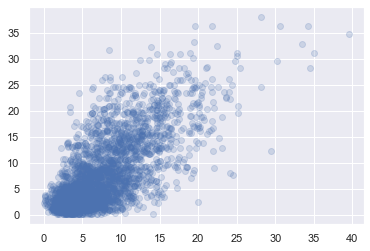

In [189]:
#scatter plot of actual nba salaries vs predicted

sns.set()
plt.ticklabel_format(style='plain')
plt.scatter(df_full['final_model_predictions'],df_full['inflation_adjusted_salary']/1000000,alpha=.2);

#sns.set()
#plt.plot(X_full,df_full['inflation_adjusted_salary'])
#plt.plot(nba_sal.predict(X_full/1000000,df_full['inflation_adjusted_salary']/1000000)

plt.savefig("Scatter Plot.png")

In [122]:
df_full.describe()

,Rk,Age,G,GS,MP,Min_per_game,FG,FG%,eFG%,TRB,...,FG_efficiency_per_min,inflation_adjusted_salary,FG_by_min_per_game,FG_by_FG_efficiency_per_min,Age_by_Min_per_game,Age_by_FG_efficency_per_min,Age_by_AST,final_model_predictions,final_model_error,final_model_abs_error
count,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,...,3325.000000,3.325000e+03,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000
mean,237.449323,26.744662,59.127218,33.821955,1537.101053,25.418588,246.187970,0.452685,0.502328,270.354286,...,0.169846,7.206959e+06,7012.853986,46.734480,678.392110,4.522584,3822.950376,7.258112,0.051153,3.414640
std,139.051755,4.063730,20.285412,28.199343,719.128501,6.484749,157.507534,0.060534,0.051741,190.269307,...,0.046189,6.607559e+06,5914.429570,41.377468,195.107585,1.363309,3518.112556,4.694841,4.588943,3.065573
min,1.000000,19.000000,5.000000,0.000000,150.000000,15.000000,11.000000,0.235000,0.235000,11.000000,...,0.035190,5.772700e+04,171.416667,0.764529,294.243243,1.013684,46.000000,0.036315,-23.240047,0.000542
25%,117.000000,24.000000,46.000000,7.000000,971.000000,19.782609,125.000000,0.413000,0.470000,132.000000,...,0.137189,2.320069e+06,2495.274194,17.730065,521.891892,3.570267,1430.000000,3.853325,-1.992861,1.259510
50%,231.000000,26.000000,65.000000,26.000000,1513.000000,25.164557,212.000000,0.444000,0.500000,225.000000,...,0.166544,4.765690e+06,5068.833333,34.169318,662.153846,4.360280,2720.000000,6.042842,0.697451,2.558637
75%,357.000000,29.000000,76.000000,61.000000,2100.000000,30.916667,338.000000,0.481000,0.532000,360.000000,...,0.198500,1.050402e+07,9891.116883,62.005247,826.736842,5.302799,4972.000000,9.594843,2.866732,4.639447
max,538.000000,42.000000,83.000000,82.000000,3239.000000,41.359375,857.000000,0.748000,0.748000,1247.000000,...,0.372867,3.807463e+07,32723.185185,303.670829,1283.780488,10.763449,24651.000000,39.511370,17.549601,23.240047
